1.Consider a binary bandit with two rewards {1-success, 0-failure}.  The bandit returns 1 or 0 for the action that you select, i.e. 1 or 2.  The rewards are stochastic (but stationary).  Use an epsilon-greedy algorithm discussed in class and decide upon the action to take for maximizing the expected reward.  There are two binary bandits named binaryBanditA.m and binaryBanditB.m are waiting for you.


In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Define binary bandit A
class BinaryBanditA(object):
    def __init__(self):
        self.prob = 0.7
    
    def reward(self, action):
        if random.random() < self.prob:
            return 1
        else:
            return 0

In [ ]:
# Define binary bandit B
class BinaryBanditB(object):
    def __init__(self):
        self.prob = 0.3
    
    def reward(self, action):
        if random.random() < self.prob:
            return 1
        else:
            return 0

In [ ]:
# Define epsilon-greedy algorithm
def epsilon_greedy(bandit, epsilon, n_iter):
    reward_history = []
    pl = [0]
    q = 0
    n = 0
    for i in range(1,n_iter):
        if random.random() < epsilon:
            # Explore: choose a random action
            action = random.choice([0, 1])
        else:
            # Exploit: choose the action with the highest estimated reward
            action = 1 if q > 0.5 else 0
        # Get the reward for the chosen action
        reward = bandit.reward(action)
        # Update the estimated reward for the chosen action using a sample-average update rule
        n += 1
        q += (reward - q) / n
        # Record the reward in the reward history
        reward_history.append(reward)
        pl.append(pl[i-1] + (reward-pl[i-1])/i)
    # Plot the reward history
    plt.plot(range(1, n_iter + 1), pl, label='epsilon = {}'.format(epsilon))
    plt.xlabel('Iteration')
    plt.ylabel('Average Reward')
   
    plt.legend()
    plt.show()

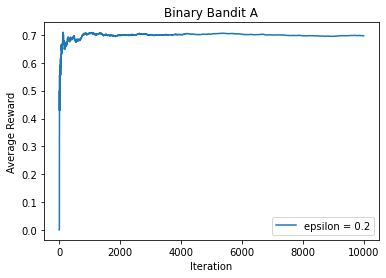

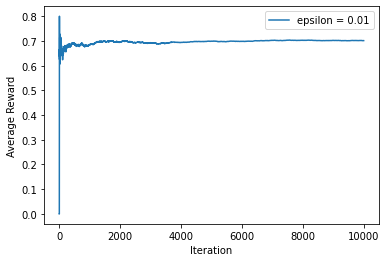

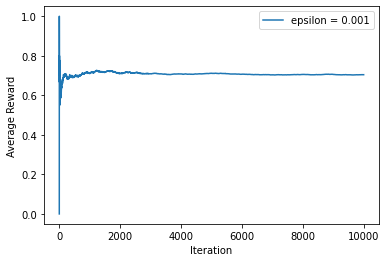

In [ ]:
# Test the epsilon-greedy algorithm on binary bandit A
banditA = BinaryBanditA()
plt.title('Binary Bandit A')
epsilon_greedy(banditA, 0.2, 10000)
epsilon_greedy(banditA, 0.01, 10000)
epsilon_greedy(banditA, 0.001, 10000)



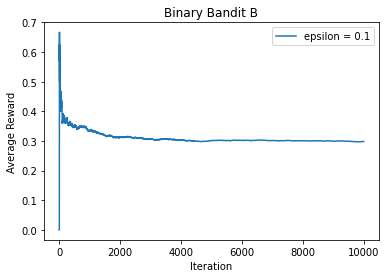

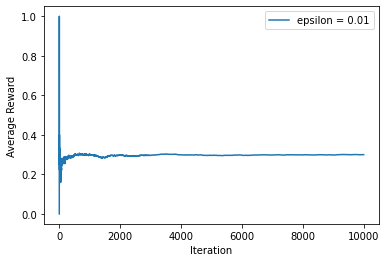

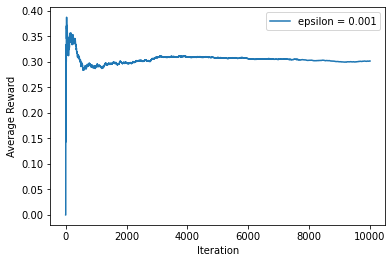

In [ ]:
# Test the epsilon-greedy algorithm on binary bandit B
banditB = BinaryBanditB()
plt.title('Binary Bandit B')
epsilon_greedy(banditB, 0.1, 10000)
epsilon_greedy(banditB, 0.01, 10000)
epsilon_greedy(banditB, 0.001, 10000)

2. Develop a 10-armed bandit in which all ten mean-rewards start out equal and then take independent random walks (by adding a normally distributed increment with mean zero and standard deviation 0.01 to all mean-rewards on each time step). 
{function [value] = bandit_nonstat(action)}



In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np
from operator import add


In [ ]:
import random
# --- Bandit ---
class Bandit(object):
  def __init__(self, N):
    # N = number of arms
    self.N = N
    
    expRewards = [1]*10 # SAME initial rewards
    self.expRewards = expRewards
  def actions(self):
    return list(range(0,self.N))
  def reward(self, action):
    prob=[]
    for i in range(self.N):
      prob.append(0.1*i)
    if (random.random()<prob[action]):
      reward =1
    else:
      reward=0
    return reward
  def nonStatReward(self,action):
    mu, sigma = 0, 0.01 # mean and standard deviation
    s = np.random.normal(mu, sigma, self.N)
    newRewards=list( map(add, self.expRewards, s) )
    self.expRewards=newRewards
    # print(newRewards)
    return newRewards[action]

In [ ]:
#method =1 for stat rewards
#method =2 for non stat rewards


def eGreedy(myBandit, epsilon, max_iteration=1000,method=1):
  # Initialization 
  Q = [0]*myBandit.N 
  count = [0]*myBandit.N
  epsilon = epsilon
  r = 0
  R = []
  R_avg = [0]*1
  max_iter = max_iteration
  # Incremental Implementation
  for iter in range(1,max_iter):
    if random.random() > epsilon:
      action = Q.index(max(Q)) # Exploit/ Greed
    else:
      action = random.choice(myBandit.actions()) # Explore
    if(method==1):
      r = myBandit.reward(action)
    else:
      r=myBandit.nonStatReward(action)
    R.append(r)
    count[action] = count[action]+1
    Q[action] = Q[action]+(r - Q[action])/count[action] #averaging over value
    R_avg.append(R_avg[iter-1] + (r-R_avg[iter-1])/iter)
  print(count)

  return Q, R_avg, R

[207, 7409, 167, 943, 197, 215, 200, 214, 208, 239]


Text(0.5, 0, 'no. of steps')

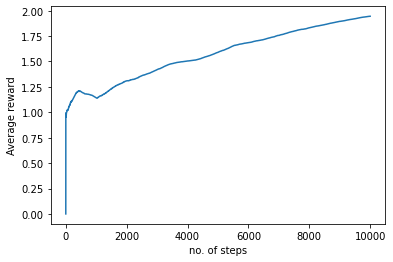

In [ ]:
N = 10
myBandit = Bandit(N)
Q, R_avg, R = eGreedy(myBandit, 0.2, 10000,2)
plt.plot(R_avg)
plt.ylabel("Average reward")
plt.xlabel("no. of steps")


3. The 10-armed bandit that you developed (bandit_nonstat) is difficult to crack with a standard epsilon-greedy algorithm since the rewards are non-stationary.  We did discuss how to track non-stationary rewards in class.  Write a modified epsilon-greedy agent and show whether it is able to latch onto correct actions or not.  (Try at least 10000 time steps before commenting on results)


In [ ]:
def modeGreedy(myBandit, epsilon, max_iteration,method=1,alpha=0.7):
  # Initialization 
  Q = [0]*myBandit.N 
  count = [0]*myBandit.N
  epsilon = epsilon
  r = 0
  R = []
  R_avg = [0]*1
  max_iter = max_iteration
  # Incremental Implementation
  for iter in range(1,max_iter):
    if random.random() > epsilon:
      action = Q.index(max(Q)) # Exploit/ Greed
    else:
      action = random.choice(myBandit.actions()) # Explore
    if(method==1):
      r = myBandit.reward(action) #Stationary rewards
    else:
      r=myBandit.nonStatReward(action) #Non Stationary rewards
    R.append(r)
    count[action] = count[action]+1
    Q[action] = Q[action]+(r - Q[action])*alpha; #assigning more weights to the current reward
    R_avg.append(R_avg[iter-1] + (r-R_avg[iter-1])/iter)
  print(count)

  return Q, R_avg, R

[640, 301, 175, 300, 2701, 377, 4282, 213, 268, 742]


Text(0.5, 0, 'no. of steps')

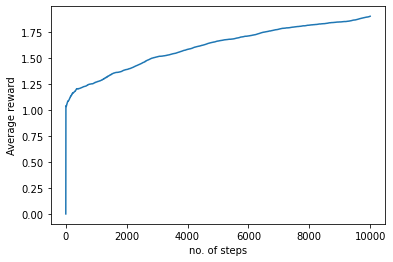

In [ ]:
N = 10
myBandit = Bandit(N)
Q1, R_avg1, R1 = modeGreedy(myBandit, 0.2, 10000,2)
plt.plot(R_avg1)
plt.ylabel("Average reward")
plt.xlabel("no. of steps")
